In [1]:
import pandas as pd
import datetime as dt
import geopandas as gpd
import shapely
import numpy as np

In [2]:
raw_data = pd.read_csv('https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=1000000&$offset=0&$order=crash_date%20DESC')

In [3]:
raw_data.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2022-11-27T00:00:00.000,16:20,MANHATTAN,10009.0,40.732594,-73.974420,"\n, \n(40.732594, -73.97442)",EAST 20 STREET,AVENUE C,NaN,...,Unspecified,NaN,NaN,NaN,4585311,Sedan,Bike,NaN,NaN,NaN
1,2022-11-27T00:00:00.000,15:50,NaN,NaN,NaN,NaN,NaN,G.C.P. / LAGUARDIA (CDR),NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,4585727,Sedan,Sedan,Sedan,NaN,NaN
2,2022-11-27T00:00:00.000,23:45,NaN,NaN,40.863150,-73.909070,"\n, \n(40.86315, -73.90907)",SEDGWICK AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4585247,Sedan,Bike,NaN,NaN,NaN
3,2022-11-27T00:00:00.000,17:41,BROOKLYN,11208.0,40.675983,-73.867840,"\n, \n(40.675983, -73.86784)",NaN,NaN,2830 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4585466,Sedan,Sedan,NaN,NaN,NaN
4,2022-11-27T00:00:00.000,22:30,BROOKLYN,11203.0,40.655884,-73.942406,"\n, \n(40.655884, -73.942406)",CLARKSON AVENUE,EAST 38 STREET,NaN,...,NaN,NaN,NaN,NaN,4585396,Sedan,NaN,NaN,NaN,NaN


In [4]:
raw_data.shape

(1000000, 29)

In [5]:
raw_data['crash_date'] = pd.to_datetime(raw_data['crash_date'])

In [6]:
raw_data['crash_date'].min()

Timestamp('2016-12-16 00:00:00')

In [7]:
data1 = raw_data[raw_data['crash_date'].dt.year >= 2017]

Bicycleset=set()
for i in [k for k in data1.columns if 'contributing_factor_vehicle_' in k]:
    for j in [m for m in data1[i].unique() if 'cyc' in str(m)]:
        Bicycleset.add(j)
list(Bicycleset)

['Pedestrian/Bicyclist/Other Pedestrian Error/Confusion']

In [8]:
x_ = []
for i in [k for k in data1.columns if 'contributing_factor_vehicle_' in k]:
    temp = data1[data1[i] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion']
    x_.append(temp)
x_.append(data1[(data1['number_of_cyclist_injured']>0)|(data1['number_of_cyclist_killed']>0)])
data1 = pd.concat(x_,axis=0,ignore_index=False).drop_duplicates().reset_index(drop=True)
data1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2022-11-26,12:45,MANHATTAN,10016.0,40.747097,-73.983450,"\n, \n(40.747097, -73.98345)",MADISON AVENUE,EAST 33 STREET,NaN,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,4585515,Box Truck,Bike,NaN,NaN,NaN
1,2022-11-26,13:32,BRONX,10458.0,40.867695,-73.891594,"\n, \n(40.867695, -73.891594)",NaN,NaN,2713 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,4585198,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,2022-11-26,14:02,NaN,NaN,40.712070,-73.996956,"\n, \n(40.71207, -73.996956)",CATHERINE STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4585478,E-Bike,NaN,NaN,NaN,NaN
3,2022-11-23,19:30,QUEENS,11375.0,40.719760,-73.843690,"\n, \n(40.71976, -73.84369)",AUSTIN STREET,71 ROAD,NaN,...,NaN,NaN,NaN,NaN,4585125,Pick-up Truck,NaN,NaN,NaN,NaN
4,2022-11-23,10:20,MANHATTAN,10011.0,40.745403,-73.996690,"\n, \n(40.745403, -73.99669)",NaN,NaN,255 WEST 24 STREET,...,Unspecified,NaN,NaN,NaN,4584192,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [9]:
data1.shape

(34013, 29)

In [10]:
data1.isna().sum()

crash_date                           0
crash_time                           0
borough                           9638
zip_code                          9639
latitude                          1931
longitude                         1931
location                          1931
on_street_name                    7400
off_street_name                  14381
cross_street_name                26624
number_of_persons_injured            2
number_of_persons_killed             1
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1        2
contributing_factor_vehicle_2     5041
contributing_factor_vehicle_3    33259
contributing_factor_vehicle_4    33910
contributing_factor_vehicle_5    33977
collision_id                         0
vehicle_type_code1                  70
vehicle_type_code2       

In [11]:
zipcodes = gpd.read_file('ZIP_CODE_040114.shp')
zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [12]:
zipcodes = zipcodes[['ZIPCODE','geometry']]
zipcodes.head()

,ZIPCODE,geometry
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [13]:
zipcodes.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
data1 = data1[['collision_id','crash_date','borough','zip_code','latitude','longitude']]
gdata1 = gpd.GeoDataFrame(data1,crs={'init': 'epsg:4326'}\
                          ,geometry=[shapely.geometry.Point(xy) for xy in zip(data1.longitude, data1.latitude)])\
                          .to_crs({'init': 'epsg:2263'})

/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [15]:
gdata1.head()

,collision_id,crash_date,borough,zip_code,latitude,longitude,geometry
0,4585515,2022-11-26,MANHATTAN,10016.0,40.747097,-73.983450,POINT (988835.756 211464.664)
1,4585198,2022-11-26,BRONX,10458.0,40.867695,-73.891594,POINT (1014233.287 255420.912)
2,4585478,2022-11-26,NaN,NaN,40.712070,-73.996956,POINT (985093.890 198702.817)
3,4585125,2022-11-23,QUEENS,11375.0,40.719760,-73.843690,POINT (1027578.897 201543.162)
4,4584192,2022-11-23,MANHATTAN,10011.0,40.745403,-73.996690,POINT (985167.174 210847.069)


In [16]:
y = gdata1[gdata1['zip_code'].isna()]
ynot = gdata1[~gdata1['zip_code'].isna()]

In [17]:
y.shape

(9639, 7)

In [18]:
Accident_Merged = gpd.sjoin(y,zipcodes,op='within',how='left').drop_duplicates('collision_id')

/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
Accident_Merged = pd.concat([Accident_Merged,ynot],axis=0,ignore_index=True).reset_index(drop=True)\
                            [['collision_id','ZIPCODE','zip_code']]

In [20]:
Accident_Merged.head()

,collision_id,ZIPCODE,zip_code
0,4585478,10038,NaN
1,4584821,10009,NaN
2,4584162,11213,NaN
3,4582715,11213,NaN
4,4583426,10032,NaN


In [21]:
Accident_Merged.shape

(34013, 3)

In [22]:
Accident_Merged_2 = Accident_Merged.copy()

In [23]:
Accident_Merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34013 entries, 0 to 34012
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   collision_id  34013 non-null  int64  
 1   ZIPCODE       8279 non-null   object 
 2   zip_code      24374 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 797.3+ KB


In [24]:
list_=[]
for i in range(len(Accident_Merged_2)):
    if np.isnan(Accident_Merged_2['zip_code'][i]):
        list_.append(Accident_Merged_2['ZIPCODE'][i])
    else:
        list_.append(Accident_Merged_2['zip_code'][i])
            
Accident_Merged_2['ZIPCODE'] = list_
Accident_Merged_2 = Accident_Merged_2.drop('zip_code',axis=1)
Accident_Merged_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34013 entries, 0 to 34012
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   collision_id  34013 non-null  int64 
 1   ZIPCODE       32653 non-null  object
dtypes: int64(1), object(1)
memory usage: 531.6+ KB


In [25]:
Accident_Merged_2 = Accident_Merged_2.dropna(axis=0)
Accident_Merged_2['ZIPCODE'] = Accident_Merged_2['ZIPCODE'].astype(int).astype(str)
Accident_Merged_2

,collision_id,ZIPCODE
0,4585478,10038
1,4584821,10009
2,4584162,11213
3,4582715,11213
4,4583426,10032
...,...,...
34008,3590788,11221
34009,3591077,10002
34010,3590291,11104
34011,3590431,11217


In [26]:
Accident_grouped = Accident_Merged_2.groupby('ZIPCODE').count().rename({'collision_id':'Accident Count'},axis=1)
Accident_grouped

,Accident Count
ZIPCODE,
10000,44
10001,372
10002,619
10003,500
10004,22
...,...
11692,26
11693,45
11694,40


In [27]:
Accident_zipcodes  = zipcodes.merge(Accident_grouped.reset_index(drop=False), on='ZIPCODE', how='left').fillna(0)
Accident_zipcodes

,ZIPCODE,geometry,Accident Count
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",31.0
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",352.0
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",332.0
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",313.0
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",339.0
...,...,...,...
258,10310,"POLYGON ((950767.507 172848.969, 950787.510 17...",48.0
259,11693,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",45.0
260,11249,"POLYGON ((995877.318 203206.075, 995968.511 20...",218.0
261,10162,"POLYGON ((997731.761 219560.922, 997641.948 21...",0.0


Text(0.5, 1.0, 'Bicycle Accident Count by Zip Code')

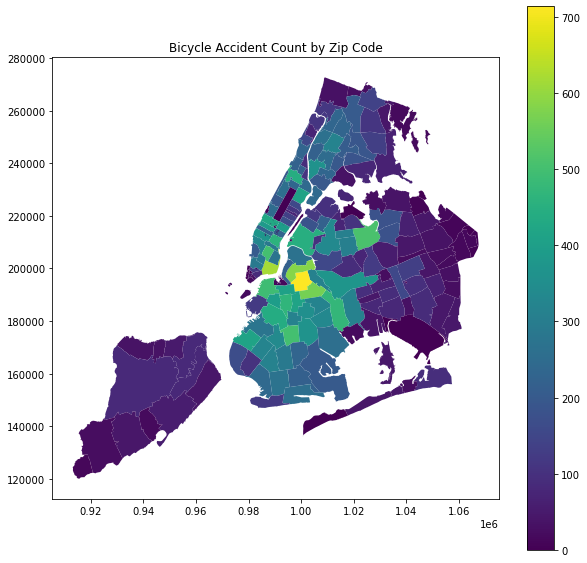

In [28]:
Accident_zipcodes.plot(figsize = (10,10),column = 'Accident Count',legend=True).set_title("Bicycle Accident Count by Zip Code")

In [29]:
Accident_zipcodes.to_csv('Accident_Zipcodes.csv')

<b> Now let us normalize the absolute values by estimates from ridership

In [30]:
year_17_18=pd.read_csv("year_17_18.csv")
year_19_20=pd.read_csv("year_19_20.csv")
year_21_22=pd.read_csv("year_21_22.csv")

/var/folders/0s/gl916j_x6z9dcjs24d_9_p680000gn/T/ipykernel_26933/888144677.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  year_21_22=pd.read_csv("year_21_22.csv")


In [31]:
merged = pd.concat([year_17_18,year_19_20,year_21_22],axis=0)
merged.shape

(3145725, 3)

In [32]:
merged = merged.reset_index(drop=False).groupby(['station_id']).agg({'Latitude':'mean','Longitude':'mean','index':'count'}).rename({'index':'Trips'},axis=1)
merged.head()

,Latitude,Longitude,Trips
station_id,,,
72,40.767272,-73.993929,5373
79,40.719116,-74.006667,3390
82,40.711174,-74.000165,1009
83,40.683826,-73.976323,1516
116,40.741776,-74.001497,2557


In [33]:
from shapely.geometry import Point

In [34]:
geometry = [Point(xy) for xy in zip(merged.Longitude, merged.Latitude)]

geoMerged = gpd.GeoDataFrame(merged,geometry=geometry,crs={'init': 'epsg:4326'}).to_crs({'init': 'epsg:2263'})

geoMerged.head()

/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ajayrangan/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Latitude,Longitude,Trips,geometry
station_id,,,,
72,40.767272,-73.993929,5373,POINT (985931.707 218814.757)
79,40.719116,-74.006667,3390,POINT (982402.007 201269.770)
82,40.711174,-74.000165,1009,POINT (984204.132 198376.421)
83,40.683826,-73.976323,1516,POINT (990816.693 188413.578)
116,40.741776,-74.001497,2557,POINT (983835.043 209525.635)


In [35]:
Trips_Merged = gpd.sjoin(geoMerged,zipcodes,predicate='within',how='left').drop('index_right',axis=1)
Trips_Merged.head()

,Latitude,Longitude,Trips,geometry,ZIPCODE
station_id,,,,,
72,40.767272,-73.993929,5373,POINT (985931.707 218814.757),10019
79,40.719116,-74.006667,3390,POINT (982402.007 201269.770),10013
82,40.711174,-74.000165,1009,POINT (984204.132 198376.421),10038
83,40.683826,-73.976323,1516,POINT (990816.693 188413.578),11217
116,40.741776,-74.001497,2557,POINT (983835.043 209525.635),10011


In [36]:
Trips_Merged = Trips_Merged.groupby('ZIPCODE').sum().drop(['Latitude','Longitude'],axis=1)
Trips_Merged.head()

,Trips
ZIPCODE,
00083,102649
10001,155343
10002,130216
10003,198946
10004,21499


In [37]:
Accidents_Trips_Merged = Accident_zipcodes.merge(Trips_Merged.reset_index(drop=False),how='left',on='ZIPCODE')
Accidents_Trips_Merged.head()

,ZIPCODE,geometry,Accident Count,Trips
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",31.0,NaN
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",352.0,780.0
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",332.0,NaN
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",313.0,6879.0
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",339.0,1186.0


In [38]:
for i in range(len(Accidents_Trips_Merged)):
    if np.isnan(Accidents_Trips_Merged.loc[i,'Trips']):
        Accidents_Trips_Merged.loc[i,'Trips'] = (Accidents_Trips_Merged.loc[i,'Accident Count']*Accidents_Trips_Merged['Trips'].mean())/Accidents_Trips_Merged['Accident Count'].mean()
Accidents_Trips_Merged.tail()       

,ZIPCODE,geometry,Accident Count,Trips
258,10310,"POLYGON ((950767.507 172848.969, 950787.510 17...",48.0,8799.178849
259,11693,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",45.0,8229.516276
260,11249,"POLYGON ((995877.318 203206.075, 995968.511 20...",218.0,46514.000000
261,10162,"POLYGON ((997731.761 219560.922, 997641.948 21...",0.0,0.000000
262,10119,"POLYGON ((986038.661 213051.063, 986135.314 21...",8.0,1453.839271


In [39]:
Accidents_Trips_Merged['Normalized Accident Count'] = 100*Accidents_Trips_Merged['Accident Count']/Accidents_Trips_Merged['Trips']
Accidents_Trips_Merged.head()

,ZIPCODE,geometry,Accident Count,Trips,Normalized Accident Count
0,11436,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",31.0,8204.448451,0.377844
1,11213,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",352.0,780.000000,45.128205
2,11212,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",332.0,87189.656920,0.380779
3,11225,"POLYGON ((995908.365 183617.613, 996522.848 18...",313.0,6879.000000,4.550080
4,11218,"POLYGON ((991997.113 176307.496, 992042.798 17...",339.0,1186.000000,28.583474


<AxesSubplot:>

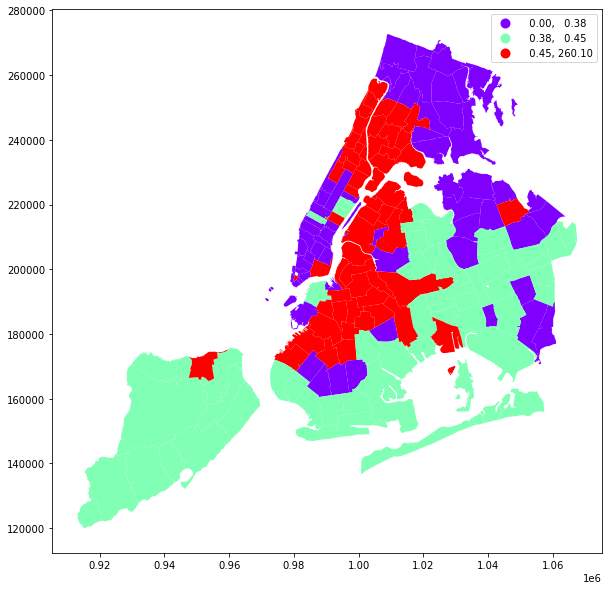

In [40]:
Accidents_Trips_Merged.plot(column='Normalized Accident Count',figsize = (10,10),legend=True, k=3, scheme='Quantiles',cmap='rainbow')